In [1]:
import scanpy as sc
from scanpy.tools._ingest import Ingest, ingest

In [2]:
sc.set_figure_params(frameon=False)

In [3]:
pbmc = sc.datasets.pbmc68k_reduced()

In [4]:
n_split = 400

In [5]:
adata_ref = sc.AnnData(pbmc.X[:n_split, :], obs=pbmc.obs.iloc[:n_split])
adata_new = sc.AnnData(pbmc.X[n_split:, :])

C:\Miniconda3\envs\work\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


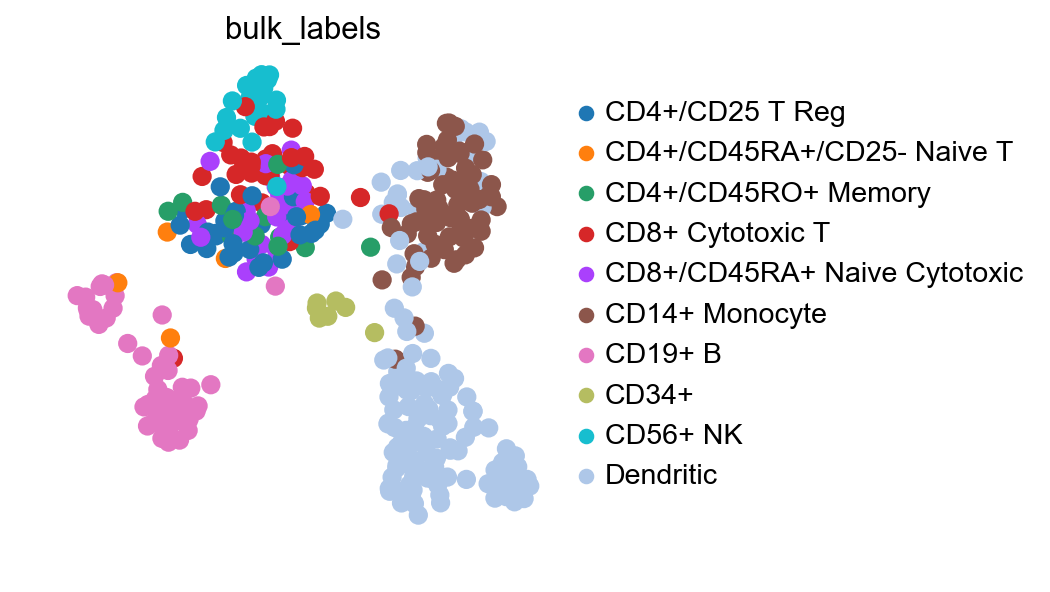

In [6]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='bulk_labels')

In [7]:
ing = Ingest(adata_ref)

In [8]:
ing.transform(adata_new)

In [9]:
ing.map_embedding(method='umap')

In [10]:
# also can do pca
ing.map_embedding(method='pca')

In [11]:
ing.neighbors()

In [12]:
ing.map_labels('bulk_labels', method='knn')

In [13]:
adata_lab = ing.to_adata()

In [14]:
adata_lab

AnnData object with n_obs × n_vars = 300 × 765 
    obs: 'bulk_labels'
    obsm: 'rep', 'X_umap', 'X_pca'

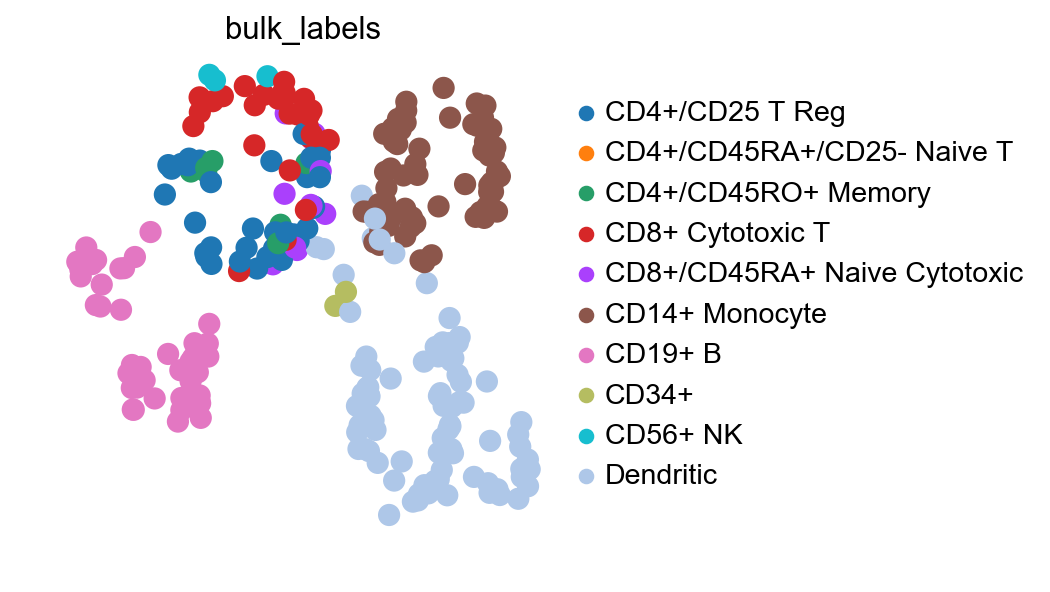

In [15]:
sc.pl.umap(adata_lab, color='bulk_labels')

In [16]:
adata_joint = ing.to_adata_joint()

In [17]:
adata_joint

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels'
    obsm: 'X_umap', 'X_pca'

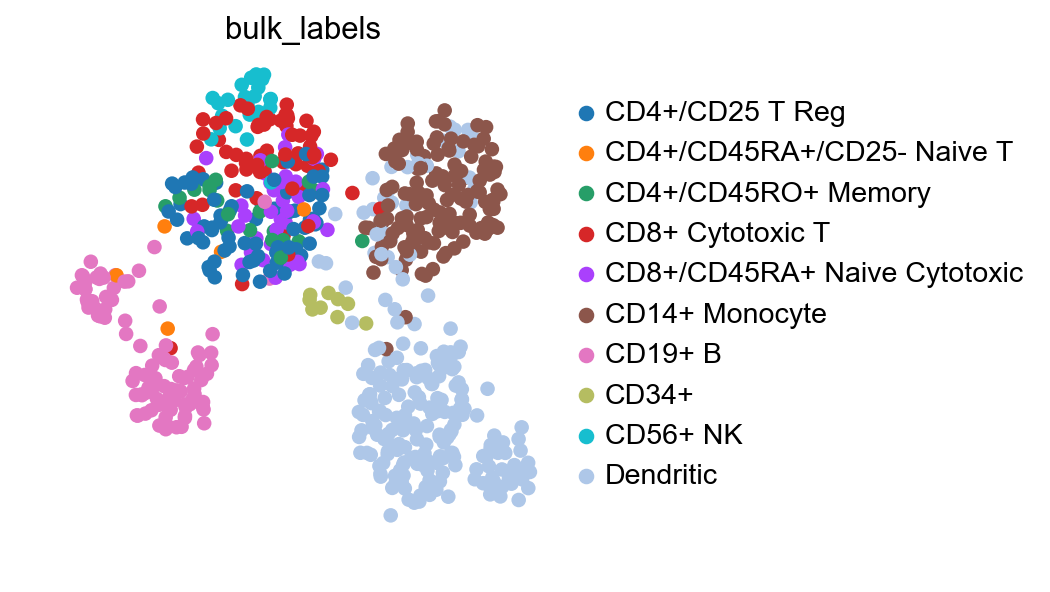

In [18]:
sc.pl.umap(adata_joint, color='bulk_labels')

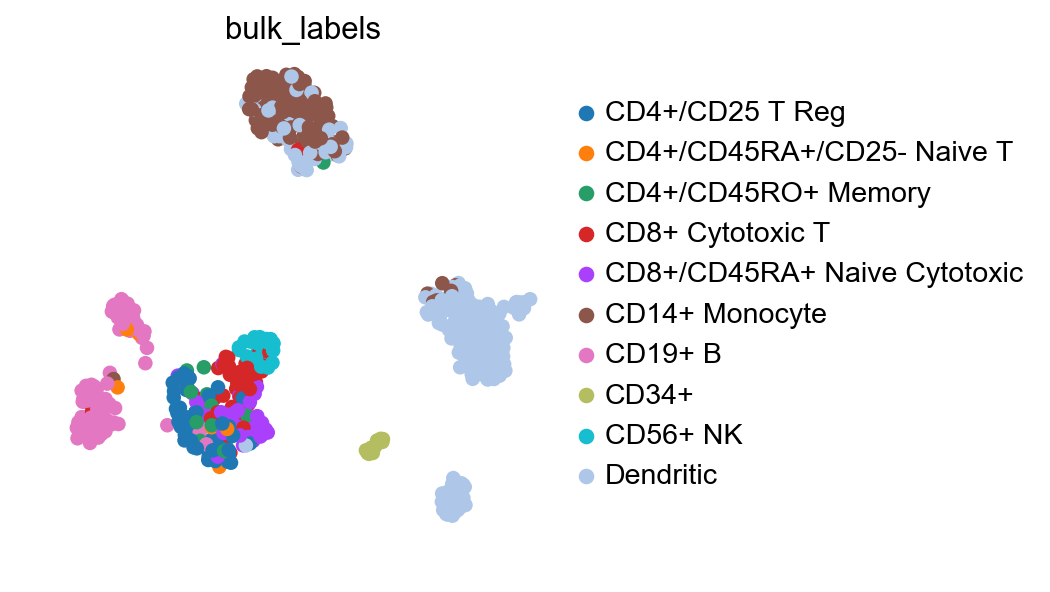

In [19]:
sc.pl.umap(pbmc, color='bulk_labels', palette=adata_joint.uns['bulk_labels_colors'])

## Or the compact way using the function

In [20]:
ingest(adata_new, adata_ref, obs='bulk_labels', embedding_method='umap', labeling_method='knn')
# same as ingest(adata_new, adata_ref, 'bulk_labels')

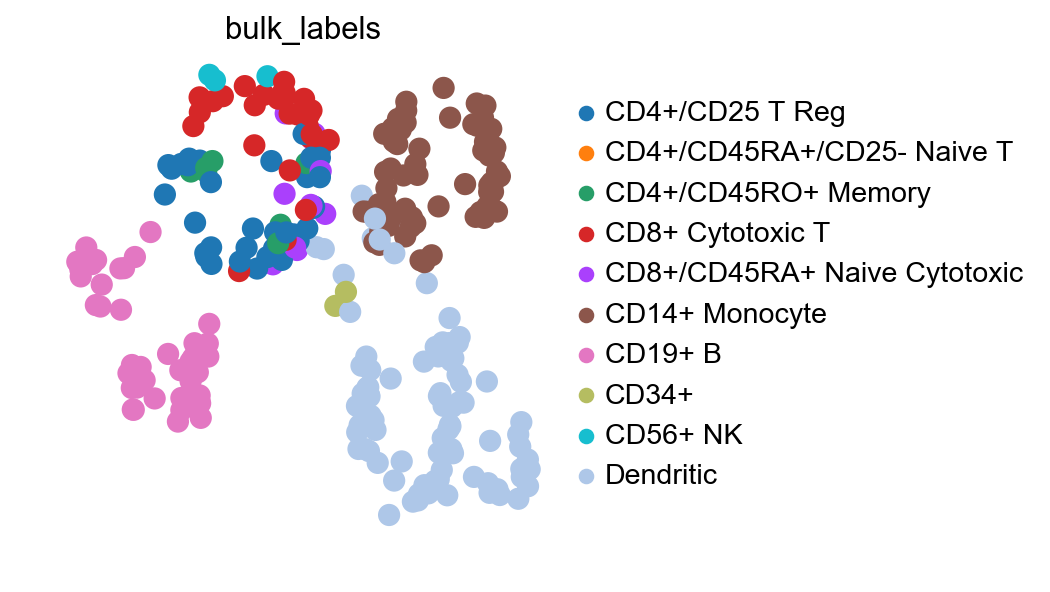

In [21]:
sc.pl.umap(adata_new, color='bulk_labels')

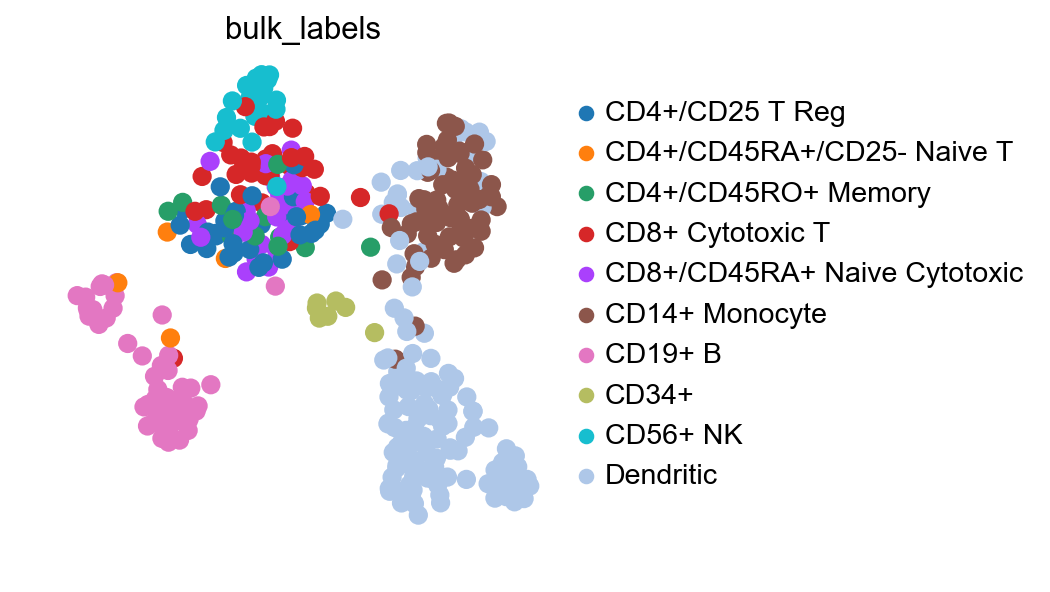

In [22]:
sc.pl.umap(adata_ref, color='bulk_labels')

In [23]:
adata_joint = ingest(adata_new, adata_ref, obs='bulk_labels', return_joint=True)

In [24]:
adata_joint

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels'
    obsm: 'X_umap'

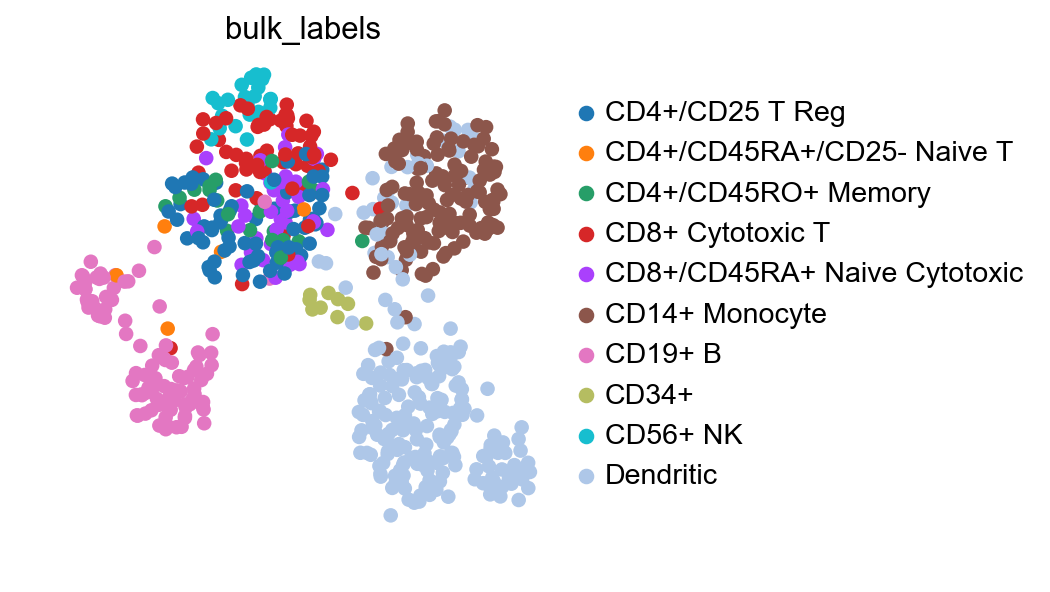

In [25]:
sc.pl.umap(adata_joint, color='bulk_labels')

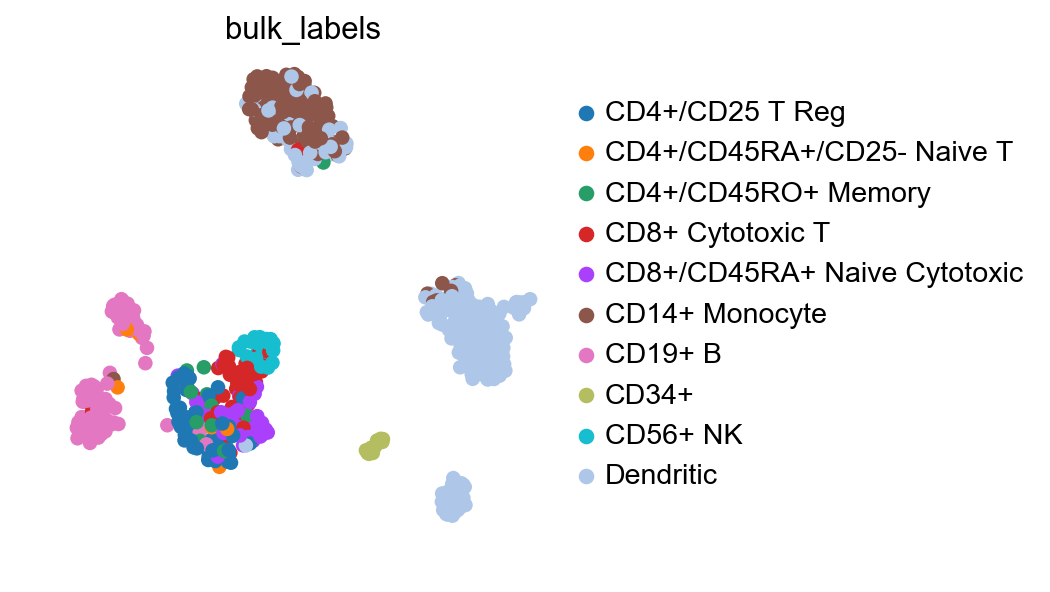

In [26]:
sc.pl.umap(pbmc, color='bulk_labels', palette=adata_joint.uns['bulk_labels_colors'])